In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# load data 
# ALL: correlation of all segments (acceleration or decceleration capacity) with the corresponding segments of the vg metric
# AC: correlating only acceleration capacity
# DC: correlating only decceleration capacity

path = "/home/jemrich/vg_graph_metrics/correlation_segmentwise.csv"
df = pd.read_csv(path)
# remove nan
df = df.dropna(axis=0, how='any')
df = df.drop_duplicates()
df

,record,metric,ALL,AC,DC,beats_per_window,edge_weight,direction,freq_domain
10,3QPGYYQXVM_Myo,minimum_cut_value_left_to_right,0.003834,0.003645,0.343285,4,slope,left_to_right,False
11,3QPGYYQXVM_Myo,maximum_flow_value_left_to_right,0.003834,0.003645,0.343285,4,slope,left_to_right,False
12,3QPGYYQXVM_Myo,shortest_path_length_left_to_right,0.999999,1.000000,0.970485,4,slope,left_to_right,False
13,3QPGYYQXVM_Myo,dag_longest_path_length,-0.981060,-0.992482,0.279279,4,slope,left_to_right,False
17,3QPGYYQXVM_Myo,minimum_cut_value_left_to_right,0.008908,0.011349,0.129010,4,angle,left_to_right,False
...,...,...,...,...,...,...,...,...,...
23086,34ASQ92JK5_Myo,maximum_flow_value_left_to_right,-0.033618,-0.077804,0.055021,4,h_distance,left_to_right,False
23089,436GO7P0NL_-,minimum_cut_value_left_to_right,0.152025,0.029122,0.313570,4,abs_h_distance,left_to_right,False
23090,436GO7P0NL_-,maximum_flow_value_left_to_right,0.152025,0.029122,0.313570,4,abs_h_distance,left_to_right,False
23096,34ASQ92JK5_Myo,minimum_cut_value_left_to_right,-0.033618,-0.077804,0.055021,4,abs_h_distance,left_to_right,False


In [64]:
# create column with largest correlation
df['max'] = df[['ALL', 'AC', 'DC']].abs().max(axis=1)
# sort by correlation
df.sort_values(by=["ALL", "AC", "DC", "metric"], ascending=False).head(10)

,record,metric,ALL,AC,DC,beats_per_window,edge_weight,direction,freq_domain,max
26,3QPGYYQXVM_Myo,shortest_path_length_left_to_right,1.000000,1.000000,0.999751,4,v_distance,left_to_right,False,1.0
16399,0FBIQ4IN69_Myo,shortest_path_length_left_to_right,1.000000,0.995010,1.000000,4,v_distance,left_to_right,False,1.0
12,3QPGYYQXVM_Myo,shortest_path_length_left_to_right,0.999999,1.000000,0.970485,4,slope,left_to_right,False,1.0
16318,0FBIQ4IN69_Myo,dag_longest_path_length,0.999993,0.099627,1.000000,4,slope,left_to_right,False,1.0
16400,0FBIQ4IN69_Myo,dag_longest_path_length,0.999993,0.099627,1.000000,4,v_distance,left_to_right,False,1.0
16315,0FBIQ4IN69_Myo,minimum_cut_value_left_to_right,0.999993,0.111495,1.000000,4,slope,left_to_right,False,1.0
16316,0FBIQ4IN69_Myo,maximum_flow_value_left_to_right,0.999993,0.111495,1.000000,4,slope,left_to_right,False,1.0
16397,0FBIQ4IN69_Myo,minimum_cut_value_left_to_right,0.999993,0.105222,1.000000,4,v_distance,left_to_right,False,1.0
16398,0FBIQ4IN69_Myo,maximum_flow_value_left_to_right,0.999993,0.105222,1.000000,4,v_distance,left_to_right,False,1.0
16626,0FBIQ4IN69_Myo,shortest_path_length_left_to_right,0.999992,-0.948088,1.000000,4,sq_distance,left_to_right,False,1.0


In [65]:
df_stack = df.set_index(['metric', 'beats_per_window', 'edge_weight', 'direction', 'freq_domain', 'record'])
df_stack = df_stack.stack()
df_stack = df_stack.reset_index()
df_stack = df_stack.rename(columns={'level_6': 'type', 0: 'correlation'}) 
df0 = df_stack.set_index(['metric', 'beats_per_window', 'edge_weight', 'direction', 'freq_domain'])
df0.index = df0.index.map(str)
df0.index.name = "index"
df0 = df0[df0['type'].isin(['AC', 'DC'])]
df0 = df0.sort_values(by=['correlation'], ascending=False)
df0

,record,type,correlation
index,,,
"('shortest_path_length_left_to_right', 4, 'v_distance', 'left_to_right', False)",3QPGYYQXVM_Myo,AC,1.000000
"('shortest_path_length_left_to_right', 4, 'v_distance', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,1.000000
"('dag_longest_path_length', 4, 'v_distance', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,1.000000
"('dag_longest_path_length', 4, 'slope', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,1.000000
"('minimum_cut_value_left_to_right', 4, 'v_distance', 'left_to_right', False)",0FBIQ4IN69_Myo,DC,1.000000
...,...,...,...
"('minimum_cut_value_left_to_right', 4, 'abs_v_distance', 'left_to_right', False)",3QPGYYQXVM_Myo,AC,-0.999994
"('minimum_cut_value_left_to_right', 4, 'sq_distance', 'left_to_right', False)",3QPGYYQXVM_Myo,AC,-0.999996
"('maximum_flow_value_left_to_right', 4, 'sq_distance', 'left_to_right', False)",3QPGYYQXVM_Myo,AC,-0.999996


In [71]:
# group by metric / calculate median over all records + select if magnitude of correclation is > 0.5
sorted = df0.groupby(by=[df0.index, 'type'])['correlation'].agg(['median', 'mean', 'std', 'count'])
sorted = sorted[abs(sorted['median'])>0.5].sort_values(by=['median'], ascending=False, key=abs)
sorted.head(10)

median      mean  \
index                                              type                       
('shortest_path_length_left_to_right', 4, 'v_di... DC    0.985556  0.982341   
                                                   AC    0.984990  0.981116   
('shortest_path_length_left_to_right', 4, 'slop... AC    0.950260  0.950320   
                                                   DC    0.908764  0.907637   
('dag_longest_path_length', 4, 'slope', 'left_t... DC    0.692429  0.662446   
('dag_longest_path_length', 4, 'v_distance', 'l... DC    0.692429  0.662446   
('shortest_path_length_left_to_right', 4, 'angl... AC    0.572583  0.552950   
('maximum_flow_value_left_to_right', 4, 'slope'... DC    0.563985  0.551146   
('minimum_cut_value_left_to_right', 4, 'slope',... DC    0.563985  0.551146   
('maximum_flow_value_left_to_right', 4, 'v_dist... DC    0.538855  0.521455   

                                                              std  count  
index                                              type                   
('shortest_path_length_left_to_right', 4, 'v_di... DC    0.014966    300  
                                                   AC    0.015992    300  
('shortest_path_length_left_to_right', 4, 'slop... AC    0.025035    300  
                                                   DC    0.046856    300  
('dag_longest_path_length', 4, 'slope', 'left_t... DC    0.168284    300  
('dag_longest_path_length', 4, 'v_distance', 'l... DC    0.168284    300  
('shortest_path_length_left_to_right', 4, 'angl... AC    0.165020    300  
('maximum_flow_value_left_to_right', 4, 'slope'... DC    0.148403    300  
('minimum_cut_value_left_to_right', 4, 'slope',... DC    0.148403    300  
('maximum_flow_value_left_to_right', 4, 'v_dist... DC    0.148763    300

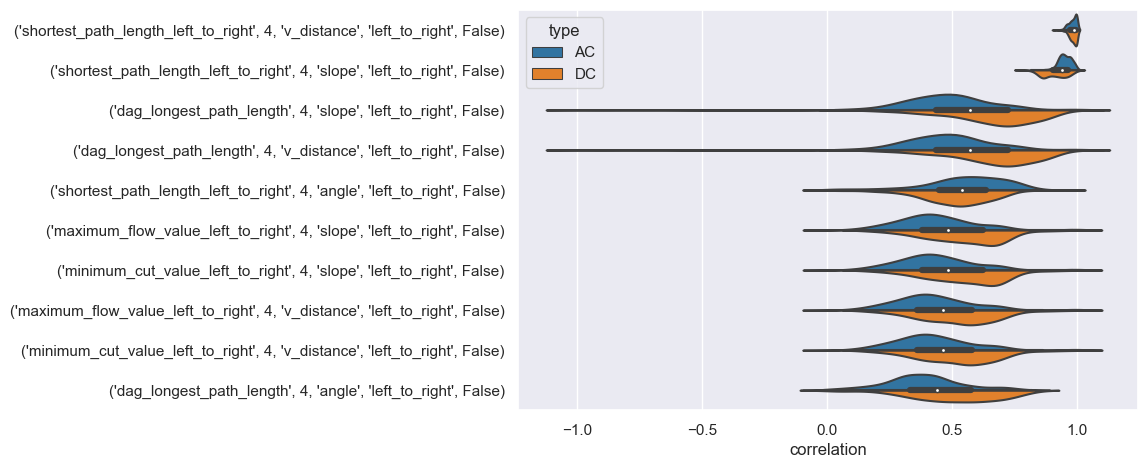

In [86]:
sns.set(rc={'figure.figsize':(8,0.4*len(sorted))})
sns.set_palette(sns.color_palette("tab10"))
ax = sns.violinplot(data=df0, y=df0.index, x="correlation", hue="type", split=True, order=sorted.index.get_level_values(0).drop_duplicates())
ax.set(xlabel='correlation', ylabel="")
ax.figure.savefig("plots/best_segmentwise_correlation.png")

In [78]:
df_bpw = df_stack.set_index(['edge_weight', 'direction', 'freq_domain'])
df_bpw.index = df_bpw.index.map(str)
df_bpw.index.name = "index"
df_bpw

,metric,beats_per_window,record,type,correlation
index,,,,,
"('slope', 'left_to_right', False)",minimum_cut_value_left_to_right,4,3QPGYYQXVM_Myo,ALL,0.003834
"('slope', 'left_to_right', False)",minimum_cut_value_left_to_right,4,3QPGYYQXVM_Myo,AC,0.003645
"('slope', 'left_to_right', False)",minimum_cut_value_left_to_right,4,3QPGYYQXVM_Myo,DC,0.343285
"('slope', 'left_to_right', False)",minimum_cut_value_left_to_right,4,3QPGYYQXVM_Myo,max,0.343285
"('slope', 'left_to_right', False)",maximum_flow_value_left_to_right,4,3QPGYYQXVM_Myo,ALL,0.003834
...,...,...,...,...,...
"('abs_h_distance', 'left_to_right', False)",minimum_cut_value_left_to_right,4,34ASQ92JK5_Myo,max,0.077804
"('abs_h_distance', 'left_to_right', False)",maximum_flow_value_left_to_right,4,34ASQ92JK5_Myo,ALL,-0.033618
"('abs_h_distance', 'left_to_right', False)",maximum_flow_value_left_to_right,4,34ASQ92JK5_Myo,AC,-0.077804


/home/jemrich/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


TypeError: 'Legend' object is not callable

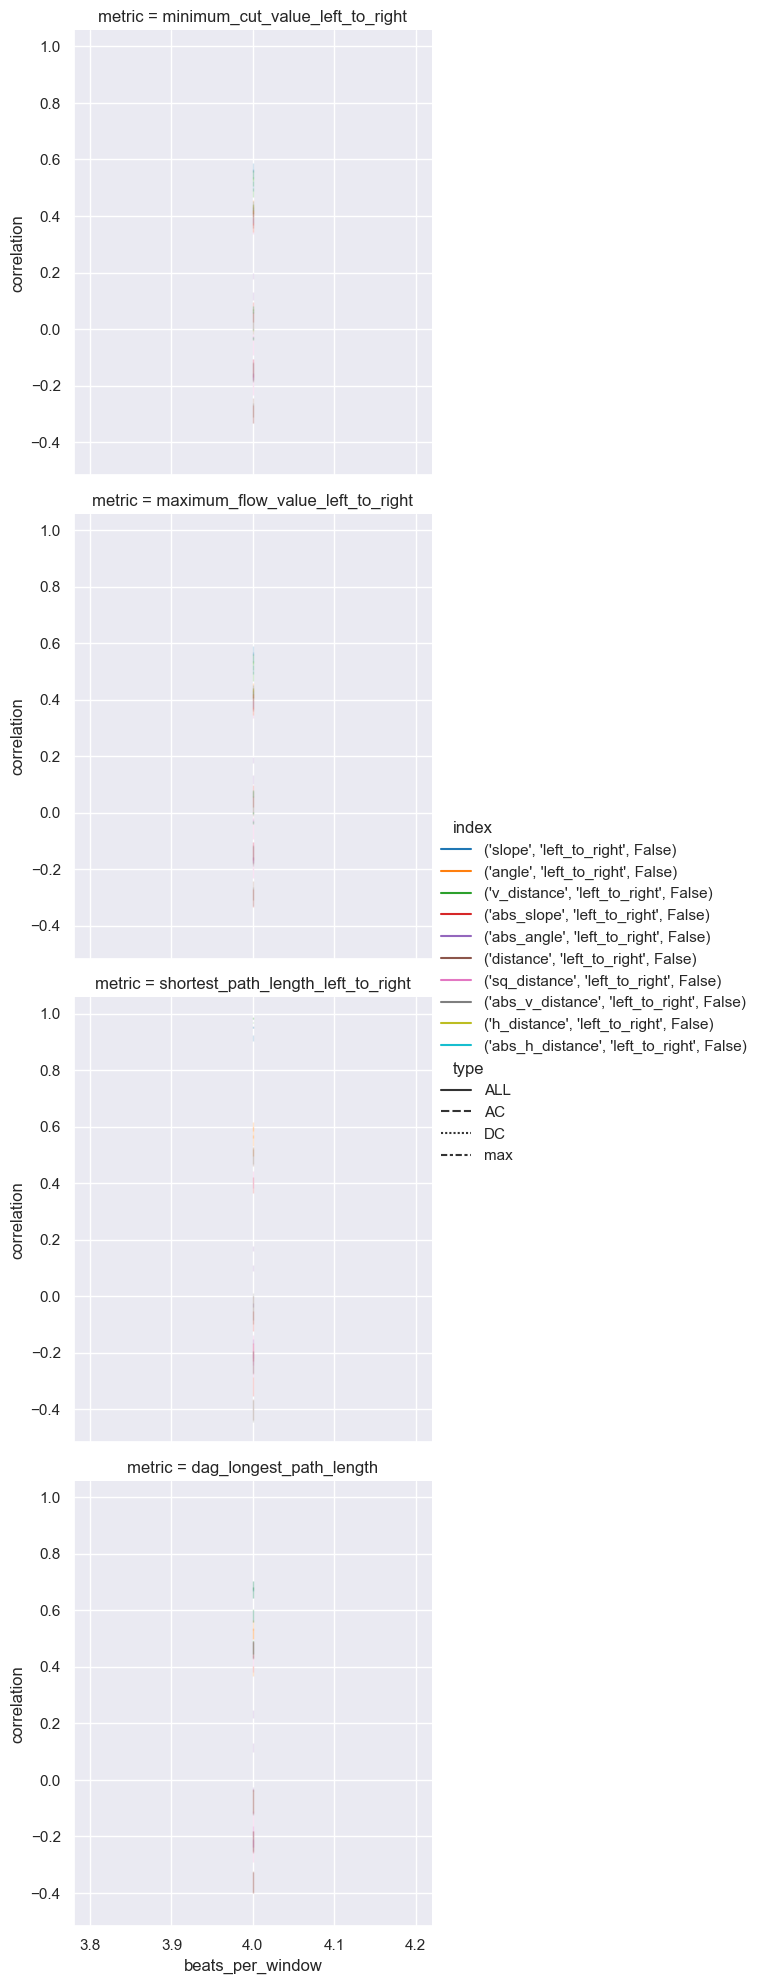

In [79]:
sns.set(rc={'figure.figsize':(15,40)})
sns.set_palette(sns.color_palette("tab10"))
ax = sns.relplot(df_bpw, x='beats_per_window', y='correlation', hue='index', style="type", row="metric", kind="line")
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)